# EDA (Exploratory Data Analysis)

- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Steps involved in EDA**
1. Describing the data
2. Data cleaning
3. Imputation techniques
4. Data analysis and visualization
5. Transformations
6. Auto EDA

**Import data and data description**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_clean.csv', index_col=0)
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [3]:
df.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [4]:
df.describe(include=object)

,Month,Weather
count,158,155
unique,6,3
top,9,S
freq,34,59


In [5]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 11.1+ KB


- As we can see that,
- 'Month' column has all the numeric data still python has shown us that it is object.
- We will have to find out the reason and change the data type of the column.

# **Data type conversion**

In [7]:
df['Month']

1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: object

In [8]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [9]:
df['Month'].replace('May',5,inplace=True)

In [10]:
df['Month'].unique()

array(['5', 5, '6', '7', '8', '9'], dtype=object)

In [11]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [12]:
df['Month'].astype(int)

1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: int32

In [13]:
df['Month'] = df['Month'].astype(int)

In [14]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month        int32
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [15]:
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S
157,14.0,191.0,14.3,9,28,2010,75,S


# Duplicates

In [16]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [17]:
df.duplicated().sum()

1

In [18]:
#Print the duplicated values

In [19]:
df[df.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,9,28,2010,75,S


In [20]:
df[(df['Ozone'] == 14.0) & (df['Solar.R'] ==191.0)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
151,14.0,191.0,14.3,9,28,2010,75,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [21]:
df[df.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
151,14.0,191.0,14.3,9,28,2010,75,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [22]:
#Drop Duplicated records

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(157, 8)

In [25]:
df.duplicated().sum()

0

# Drop columns

- There is one column which only has single different value.
- We need to get rid of all the uneccesary columns or else it will be very complex data.

In [26]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S


In [27]:
df.drop(columns=['Year'],inplace=True)

In [28]:
df

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


In [29]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S


In [30]:
data = df.drop(columns=['Temp'])

In [31]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S


In [32]:
data

,Ozone,Solar.R,Wind,Month,Day,Weather
1,41.0,190.0,7.4,5,1,S
2,36.0,118.0,8.0,5,2,C
3,12.0,149.0,12.6,5,3,PS
4,18.0,313.0,11.5,5,4,S
5,NaN,NaN,14.3,5,5,S
...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,S
154,41.0,190.0,7.4,5,1,C
155,30.0,193.0,6.9,9,26,PS
156,NaN,145.0,13.2,9,27,S


# Rename the columns

In [33]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S


In [34]:
df.rename(columns={'Solar.R':'Solar','Temp':'Temperature'},inplace=True)

In [35]:
df

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


# Missing value imputation

- In dataset, missing data, or missing values, occur when no data value is stored for the variable in an observation.
- Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.
- If we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
- Handling missing values is a crucial step in EDA.
- Missing values can appear for several reasons like:
    - Incomplete data entry
    - Issues with machines
    - Improper handling of data
    - And many more.
         

In [36]:
#Checking null values

In [37]:
df

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


In [39]:
df.isna()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,True,False,False,False,False,False,False


In [40]:
df.isna().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [ ]:
#Visualizing missing values

<AxesSubplot:>

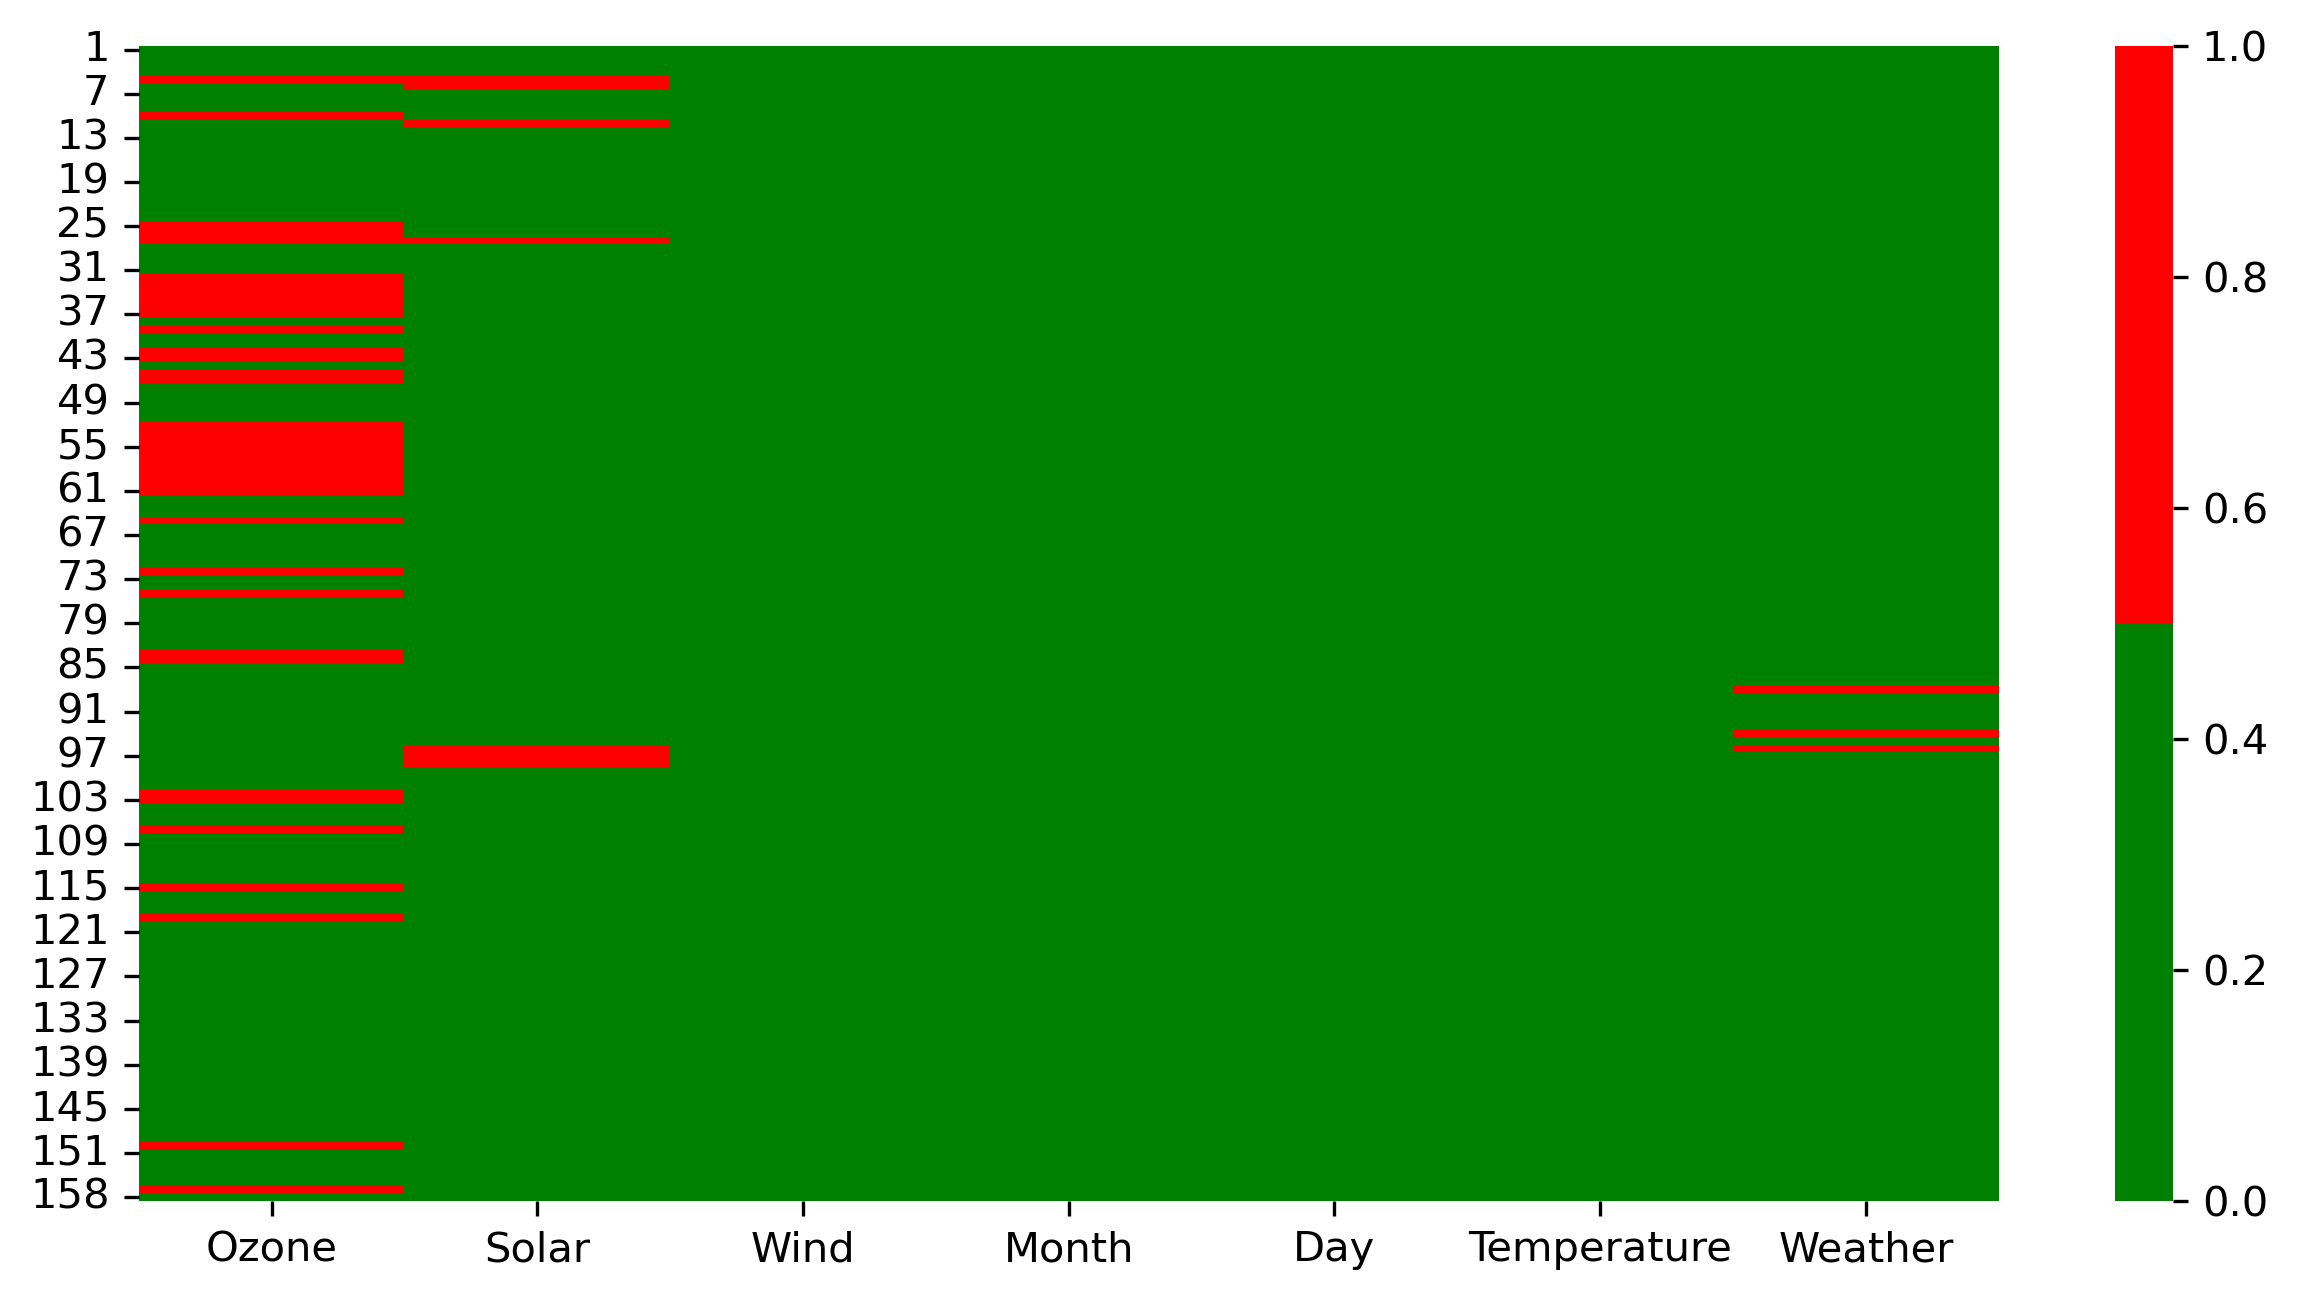

In [42]:
sns.heatmap(df.isna(),cmap = ['green','red'])

In [45]:
df.isna().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [44]:
#Calculate the percentage of missig values in each column.
for i in df.isna().sum():
    print((i/len(df))*100)

24.203821656050955
4.45859872611465
0.0
0.0
0.0
0.0
1.910828025477707


# Rule for missing value imputation:
1. If NA values are between 1 to 5%, drop na (rows)
2. If NA value are 5 to 40%, fillna(replace)
3. If NA values are greater than 50% in a column, drop that entire column.

In [46]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S


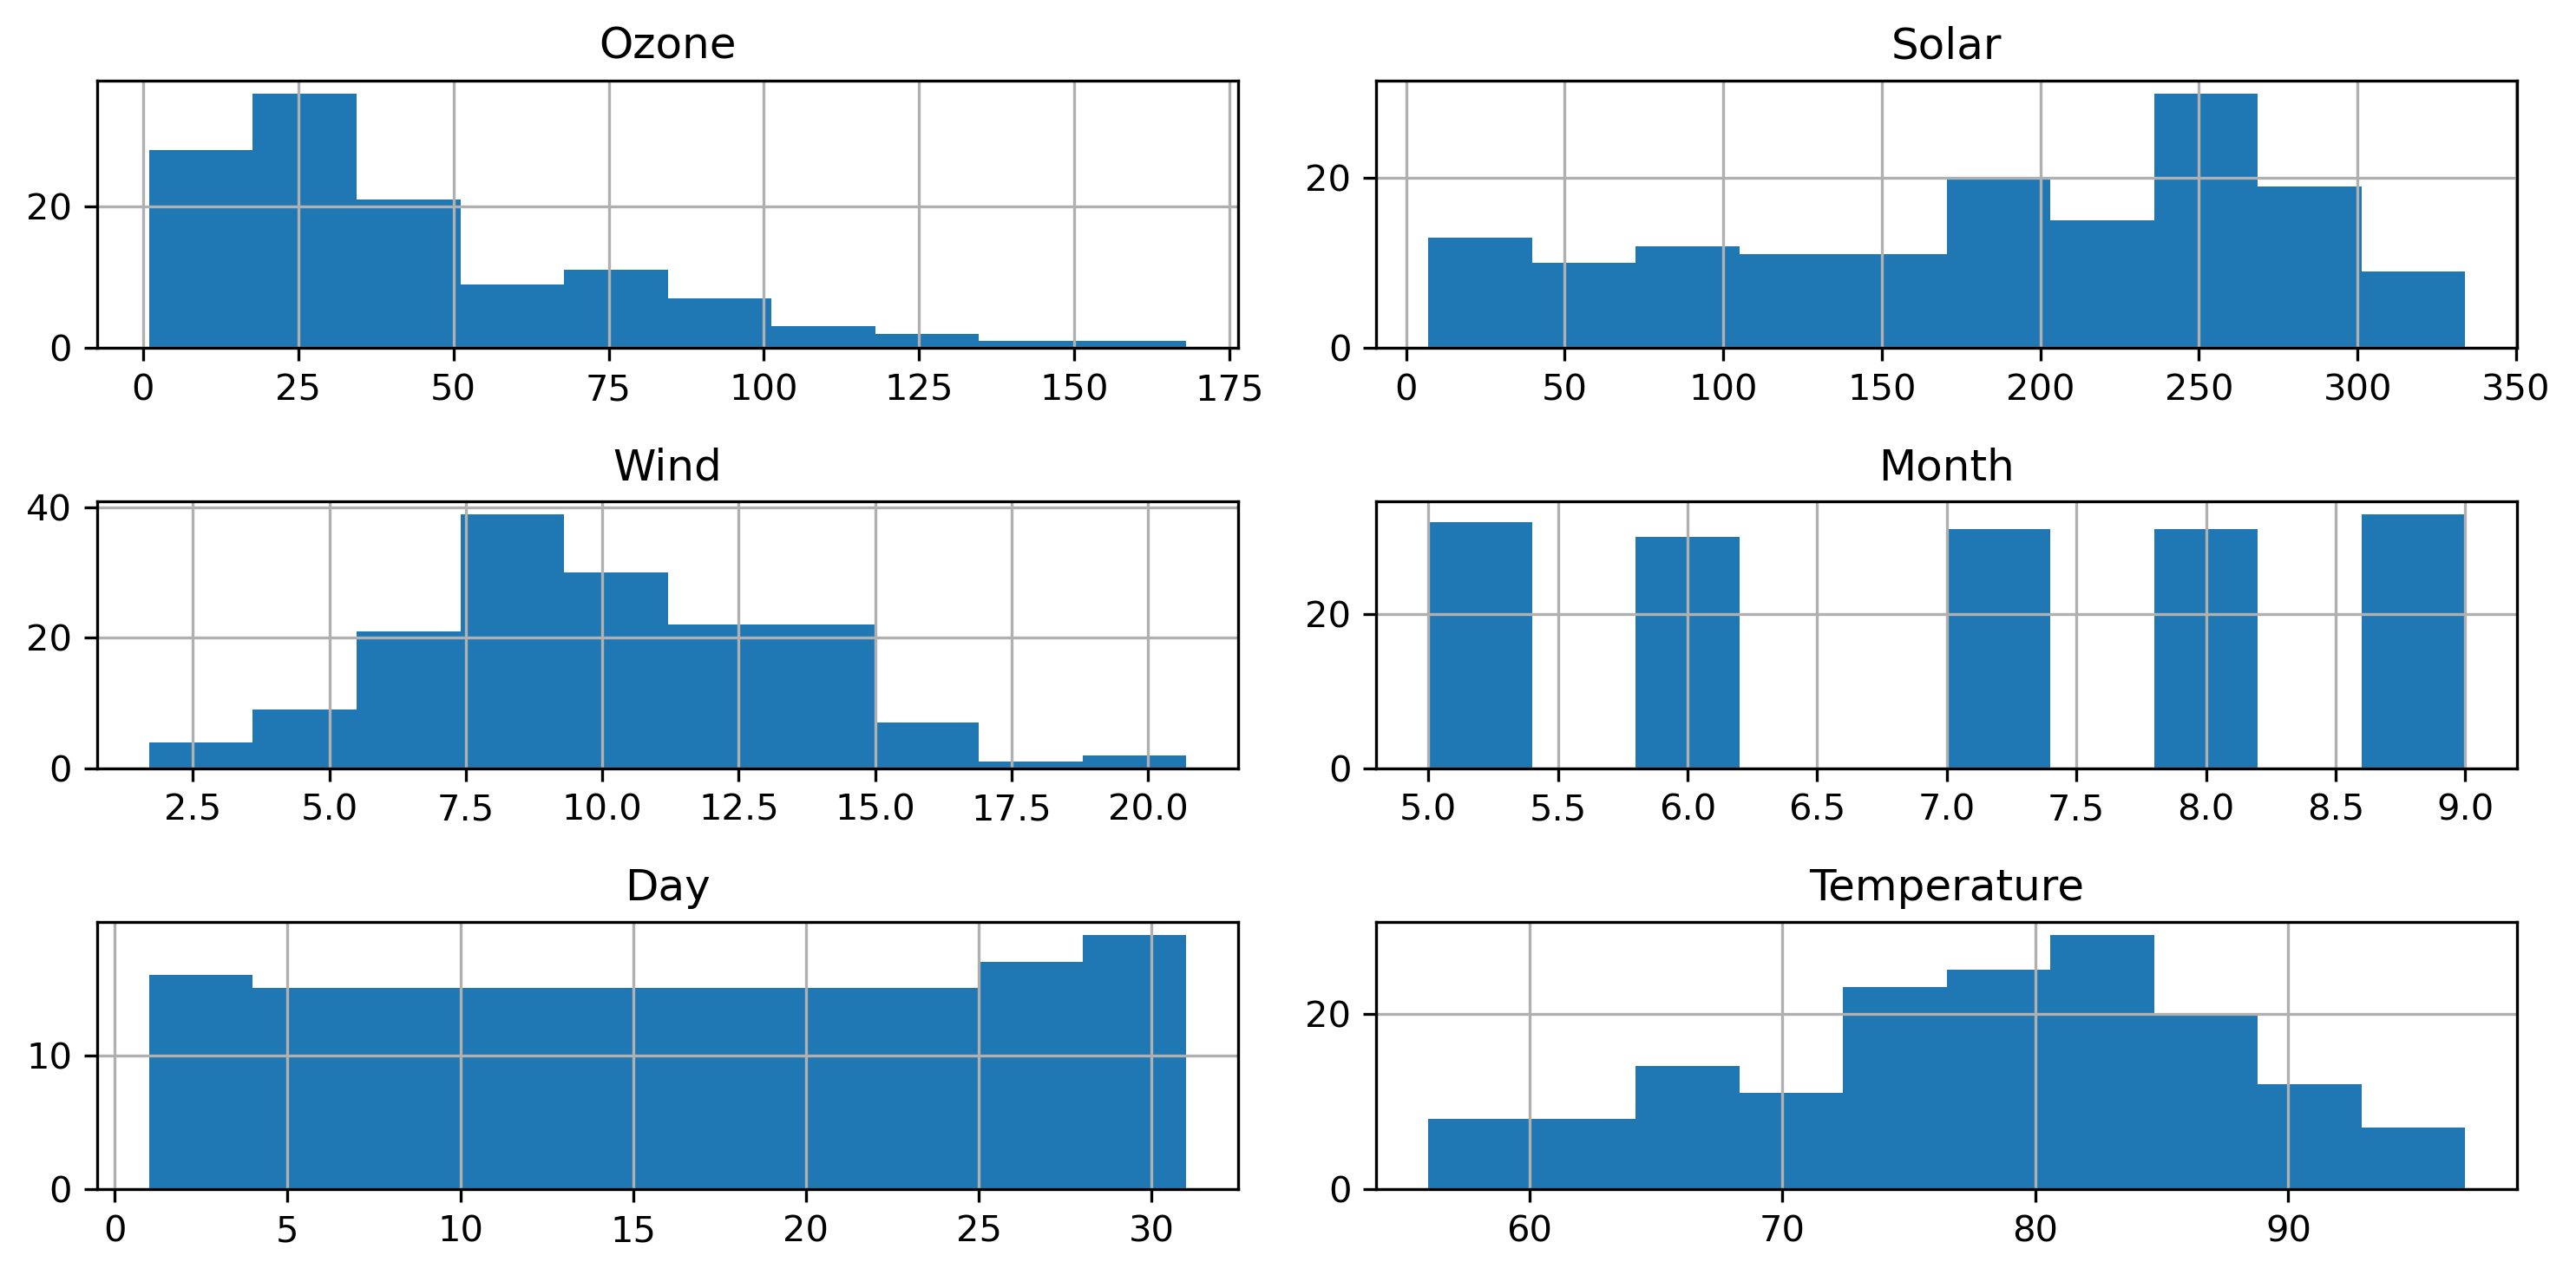

In [48]:
df.hist()
plt.tight_layout()

<AxesSubplot:xlabel='Solar'>

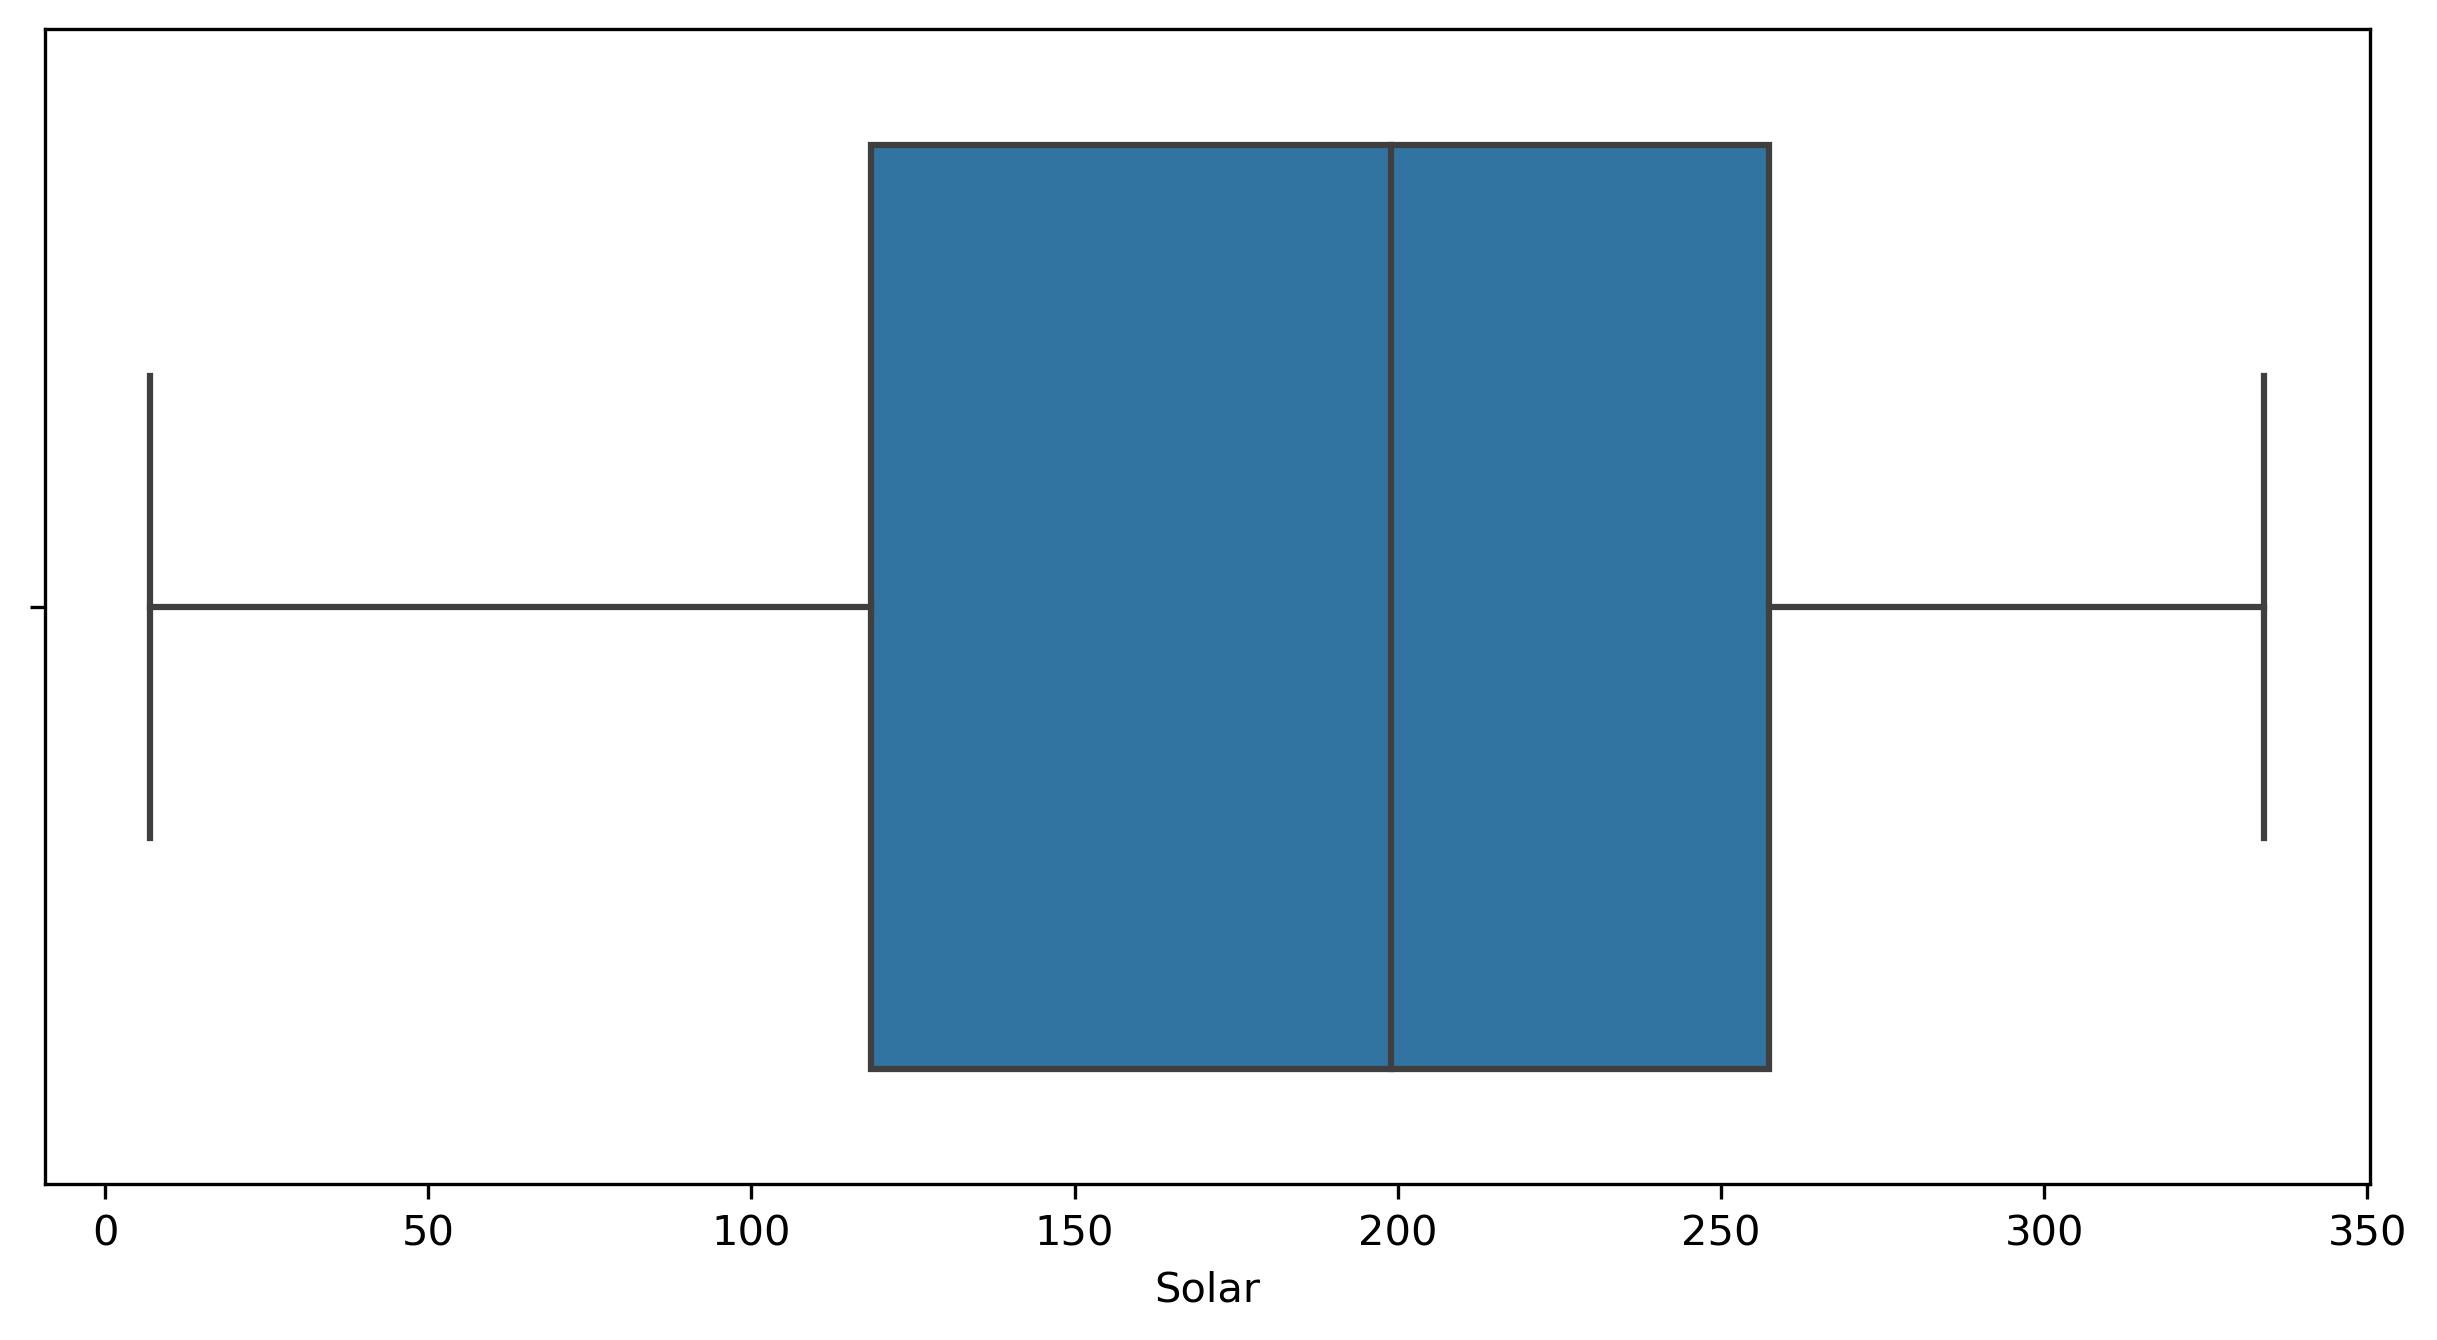

In [49]:
sns.boxplot(df['Solar'])

In [51]:
ozone_median = df['Ozone'].median()

In [54]:
df['Ozone'].fillna(ozone_median, inplace=True)

In [56]:
df['Solar'].fillna(df['Solar'].mean(), inplace=True)

In [59]:
df['Weather'].mode()[0]

'S'

In [62]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

In [63]:
df.isna().sum()

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Temperature    0
Weather        0
dtype: int64

# Outlier detection

- There are multiple approaches to detect outliers in the dataset.
    - Histogram
    - Boxplot
    - Descriptive stats for df

In [ ]:
#Outlier detection function

In [ ]:
#Capping Outliers

# Scatter Plot and Correlation

In [ ]:
#Correlation coefficient

# Transformations

- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convert all the categorical columns into numerical.

In [ ]:
#Encoding using pandas dummy function.

# **Scaling the data**

- Normalization
    - Scales value within the range of 0 to 1.
- Standardization
    - Uses Z score for scaling.
    - Scale values in such a way that the mean = 0 and standard deviation is 1.

# Speed up the EDA process

In [ ]:
!pip install pandas-profiling==3.1.0
!pip install sweetviz

In [ ]:
import pandas_profiling as pp
import sweetviz as sv

In [ ]:
df = pd.read_csv('data_clean.csv', index_col=0)
df

- For a dataset with less elements than a given number (say 5), pandas-profiling assumes that your variable is categorical instead of numerical.

In [ ]:
EDA_report= pp.ProfileReport(df,vars=dict(num={"low_categorical_threshold": 0}))
EDA_report

In [ ]:
report = sv.analyze(df)

In [ ]:
report

In [ ]:
report.show_html('sweetviz.html')